<a href="https://colab.research.google.com/github/sumitgaikwad8877/Online_retail_customer_segmentation/blob/main/Online_retail_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>Problem Description<b>
In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.


##<b>Business Objective:
Customer segmentation is the practice of dividing a company’s customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

Customer segmentation has the potential to allow marketers to address each customer in the most effective way. Using the large amount of data available on customers (and potential customers), a customer segmentation analysis allows marketers to identify discrete groups of customers with a high degree of accuracy based on demographic, behavioral and other indicators.

In [82]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from datetime import datetime
import datetime as dt
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [83]:
#imorting important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

# #set style
# # plt.style.use('seaborn')
# sns.set()


# # setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# plt.rcParams["axes.titlesize"] = 25
# plt.rcParams["axes.titleweight"] = 'bold'
# plt.rcParams['xtick.labelsize']=15
# plt.rcParams['ytick.labelsize']=15
# plt.rcParams["axes.labelsize"] = 20
# plt.rcParams["legend.fontsize"] = 15
# plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')
from numpy import math



In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
# Read the dataset 'Online retail'.
df = pd.read_excel('/content/drive/MyDrive/data/Online Retail (1).xlsx')

In [86]:
# Extracting top 5 record or rows from our dataframe, to have a overview of our data.

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [87]:
# Extracting bottom 5 record from our dataframe.
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [88]:
# Shape of dataset.
df.shape

(541909, 8)

In [89]:
# Get all the features of dataset
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [90]:
# View the description of the dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### We got to know that our dataset consist 541909 Row's and 8 Column's.

## <B>Feature Discription <B>
* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.

In [91]:
# Check all the information summary of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [92]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [93]:
# Check the uunique values
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## <B>Data Preprocessing

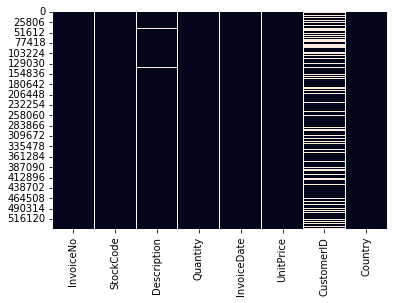

In [94]:
# Plotting the null values on heatmap
sns.heatmap(df.isnull(), cbar = False)


 It is evident from above plot that there are some null values in features Description and CustomerID.

In [95]:
#  Drop the null value
df.dropna(inplace = True)


In [96]:
# check the information summary after dropping null values
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [97]:
df.shape

(406829, 8)

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


 After removing all the null values the observation in our dataset redces to (406829, 8)

In [99]:
# Check duplicate values in our dataset
len(df[df.duplicated()])

5225

We can see that there are 5225 duplicate values in our dataset.

In [100]:
# views the duplicate values in our dataset

df[df.duplicated()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [101]:
# drop the duplicate values from the datase
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


After dropping the duplicate values the shape of the dataset changes to(401604, 8)

# We also need to drop some InvoiceNo which starts with 'c' as it indicates cancellation.


In [102]:
# check the InviceNo that starts with c
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [103]:
df = df[~df['InvoiceNo'].str.contains('C')]
df.shape

(397924, 8)

## **`FEATURE ENGINNERING`**

In [104]:
# Converting Invoicce date to date time format.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%y %H-%M")

In [105]:
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['month_num'] = df['InvoiceDate'].apply(lambda x: x.month)
df['day'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['minute'] = df['InvoiceDate'].apply(lambda x: x.minute)

In [106]:
# Extracting month from InvoiceDate.
df['month'] = df['InvoiceDate'].dt.month_name()

In [107]:
# Extracting day from InvoiceDate.
df['day'] = df['InvoiceDate'].dt.day_name()

In [108]:
df['total_amount'] = df['Quantity'] * df['UnitPrice']

In [109]:
df.shape

(397924, 15)

In [110]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day',
       'hour', 'minute', 'month', 'total_amount'],
      dtype='object')

## <b>Exploratory Data Analysis(EDA)

In [111]:
#  view Top 10 products
Top_10_products = df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name', 'Description':'Count'}).head(10)
Top_10_products

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


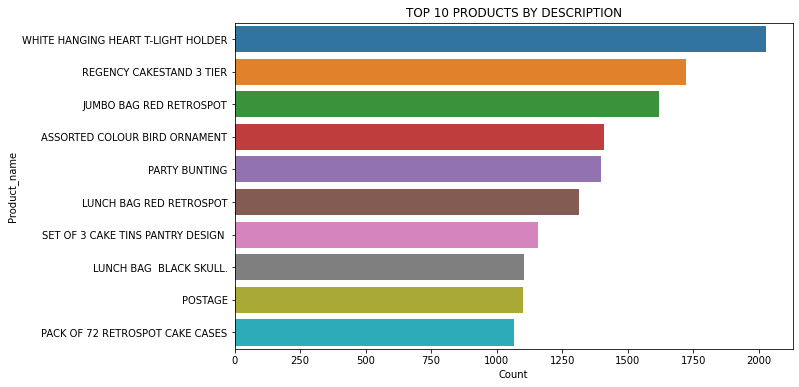

In [112]:
# Top 10 products in terms of description.
plt.figure(figsize=(10,6))
sns.barplot(y=Top_10_products['Product_name'], x=Top_10_products['Count'])
plt.title('TOP 10 PRODUCTS BY DESCRIPTION')
plt.show()

**OBSERVATION-**
* White hanging T-Light holder is most selling product which has almost 2018 unit sold.
* Regency Cakestand 3 Tier is 2nd most sold product after the white hanging t-light holder.

In [113]:
# Lets check the unique id of the customer
df['CustomerID'].nunique()

4339

In [114]:
# Most active customers
active_customers = pd.DataFrame(df['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
active_customers.rename(columns = {'index':'CustomerID', 'CustomerID':'Count'},inplace = True)
active_customers

,CustomerID,Count
0,17841.0,7847
1,14911.0,5677
2,14096.0,5111
3,12748.0,4596
4,14606.0,2700
...,...,...
4334,15802.0,1
4335,15510.0,1
4336,13366.0,1
4337,18068.0,1


Text(0, 0.5, 'Count')

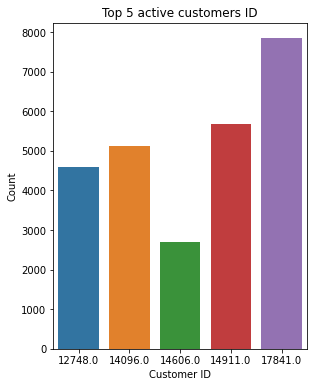

In [115]:
# Now lets plot the top 5 customers
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(active_customers['CustomerID'][:5],active_customers['Count'][:5])
plt.title('Top 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

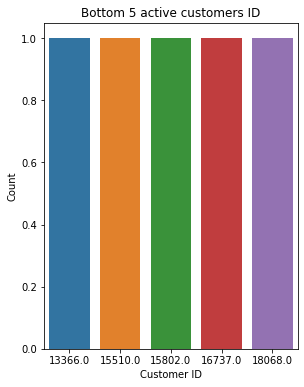

In [116]:
# Bottom 5 customer id
plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
sns.barplot(active_customers['CustomerID'][-5:],active_customers['Count'][-5:])
plt.title('Bottom 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

In [117]:
# top 10 Customer  frquency purchesing
Top_10 =df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Count'}).head(10)
Top_10

,CustomerID,Count
0,17841.0,7847
1,14911.0,5677
2,14096.0,5111
3,12748.0,4596
4,14606.0,2700
5,15311.0,2379
6,14646.0,2080
7,13089.0,1818
8,13263.0,1677
9,14298.0,1637


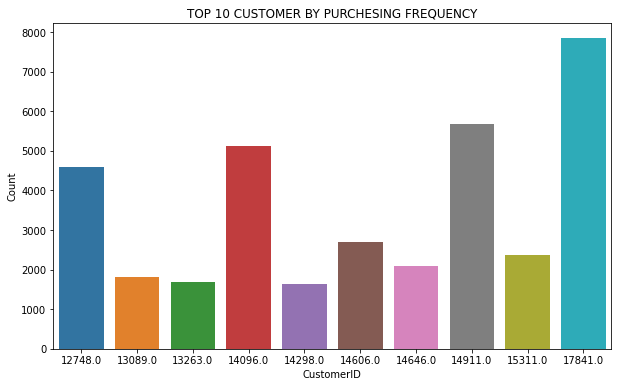

In [118]:
# Visualizing Top 10 Customer by their frquency of purchesing.
plt.figure(figsize=(10,6))
sns.barplot(y=Top_10['Count'],x=Top_10['CustomerID'])
plt.title('TOP 10 CUSTOMER BY PURCHESING FREQUENCY')
plt.show()


**OBSERVATION-**
* CustomerID-17841 has bought most products.
* .CustomerID-14911 has bought 2nd highest products.

In [119]:
# top 5 Country highest sell
Top5_countries = df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Count'})
Top5_countries

,Country,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1462
9,Australia,1185


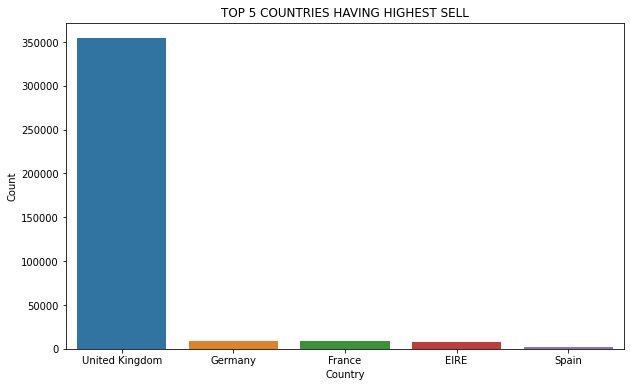

In [120]:
# Visualizing the Top 5 Countries wich has highest sell.
plt.figure(figsize=(10,6))
sns.barplot(x=Top5_countries['Country'].head(5),y=Top5_countries['Count'].head(5))
plt.title('TOP 5 COUNTRIES HAVING HIGHEST SELL')
plt.show()

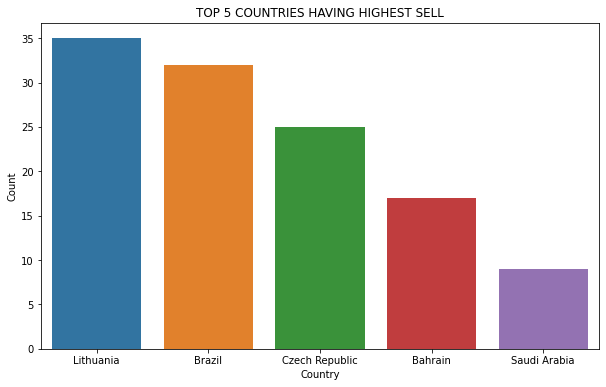

In [121]:
# Visualizing the Top 5 countries which has least no of customers.
plt.figure(figsize=(10,6))
sns.barplot(x=Top5_countries['Country'].tail(5),y=Top5_countries['Count'].tail(5))
plt.title('TOP 5 COUNTRIES HAVING HIGHEST SELL')
plt.show()

**OBSERVATION-**
* The country United Kingdom has the highest number of customer, which is preety obvious as per statement out data is mainly UK based data.
* On the other hand Saudi Arabia has least number of customers or low sell.

## <b>Analysis of categorical features

In [122]:
# Analyze categorical features
categorical_columns = list(df.select_dtypes(['object']).columns)
categorical_features = pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country', 'day', 'month'], dtype='object')

In [123]:
# View the Invoiceno counts
df['InvoiceNo'].value_counts()

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
561657      1
546775      1
546827      1
546828      1
565975      1
Name: InvoiceNo, Length: 18536, dtype: int64

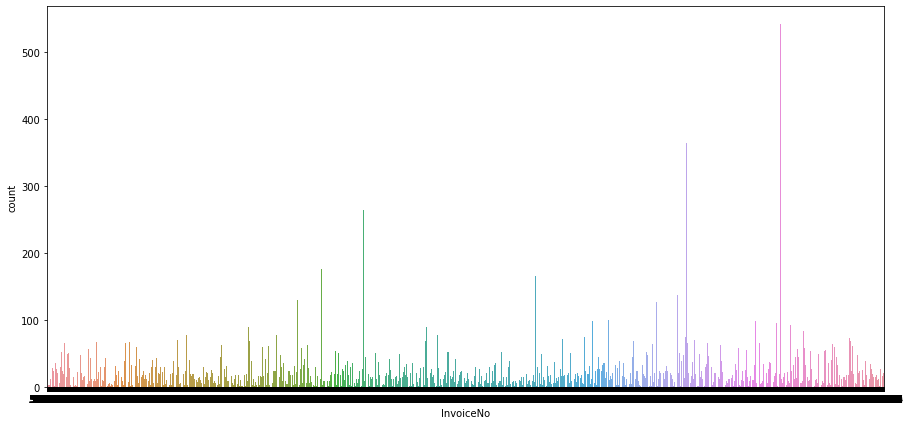

In [124]:
# Plot the invoice count
plt.figure(figsize=(15,7))
sns.countplot(x = 'InvoiceNo', data = df)

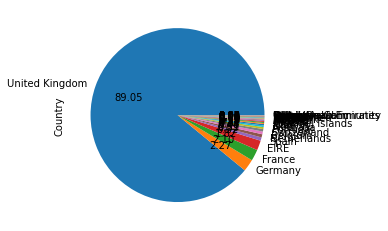

In [125]:
# all Country show in pie chart
df['Country'].value_counts().plot(kind='pie',autopct='%.2f')

## <b>StockCode

In [126]:
# Create a variable and count the stockcode
stockcode_df = df['StockCode'].value_counts().reset_index()
stockcode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
stockcode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
stockcode_df.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


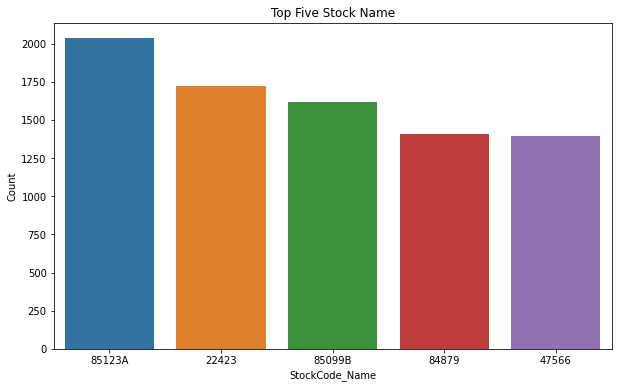

In [127]:
# Plot top 5 stock name
plt.figure(figsize=(10,6))
plt.title('Top Five Stock Name')
sns.barplot(x = 'StockCode_Name', y= 'Count', data = stockcode_df[:5])


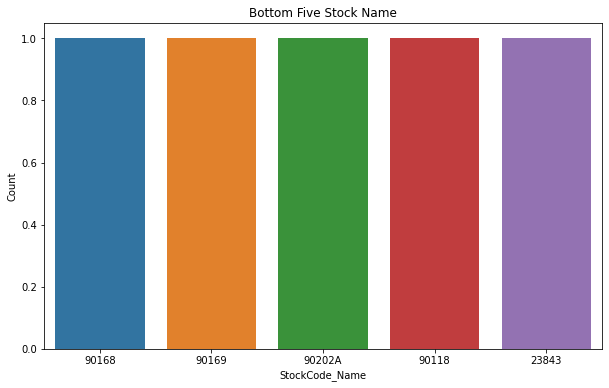

In [128]:
# Plot bottom 5 stock name
plt.figure(figsize=(10,6))
plt.title('Bottom Five Stock Name')
sns.barplot(x = 'StockCode_Name', y= 'Count', data = stockcode_df[-5:])


##<b>Analyzing all Numerical Features

In [129]:
 # Assigning numerical columns to variables
numerical_columns = list(df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features


Index(['Quantity', 'UnitPrice', 'CustomerID', 'year', 'month_num', 'hour',
       'minute', 'total_amount'],
      dtype='object')

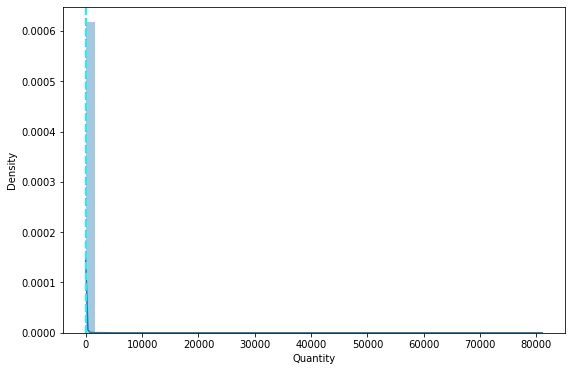

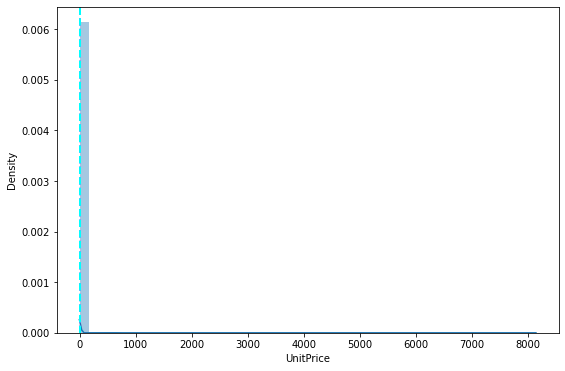

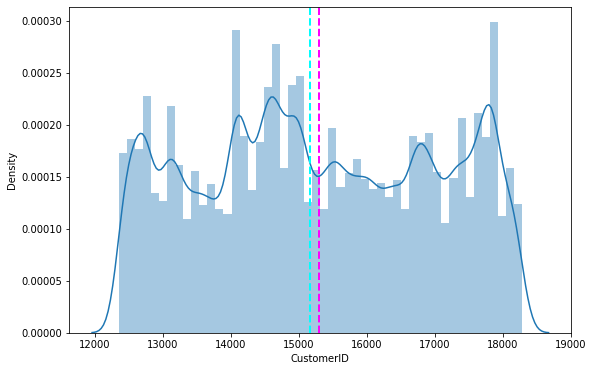

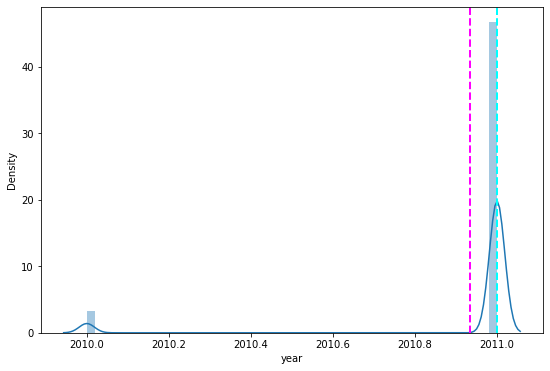

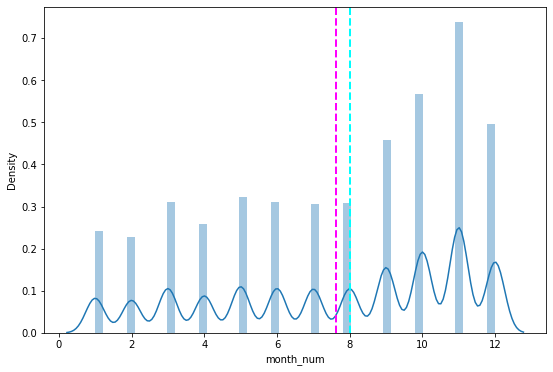

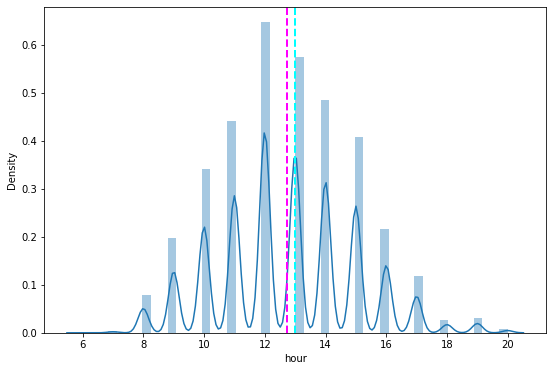

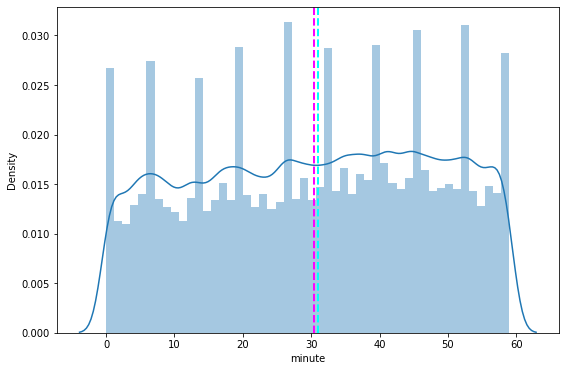

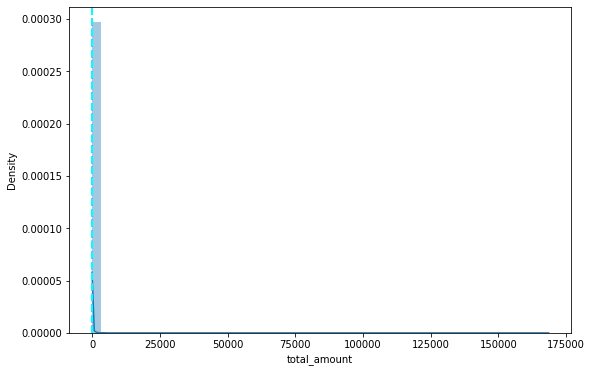

In [130]:
 # Analysing distribution of all numerical variables
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(x=df[col])
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.xlabel(col)
plt.show()

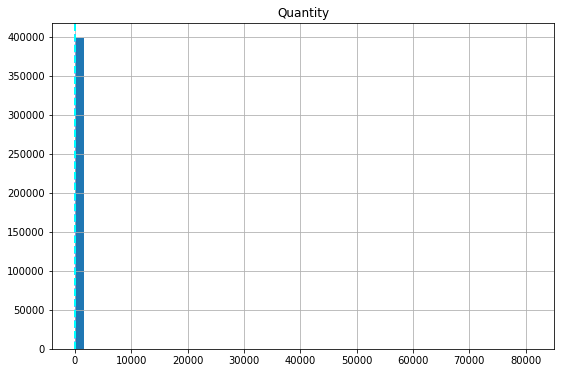

Skewness : 403.31943081039486
Kurtosis : 173965.71516660746


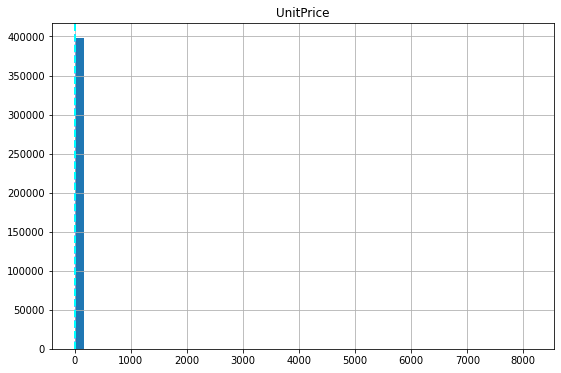

Skewness : 204.04241268899307
Kurtosis : 58146.02091050399


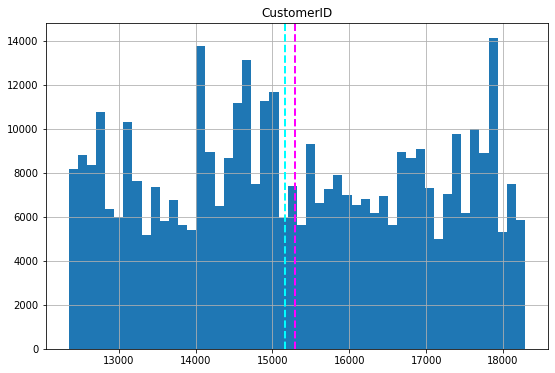

Skewness : 0.02577629847429845
Kurtosis : -1.1808302151571712


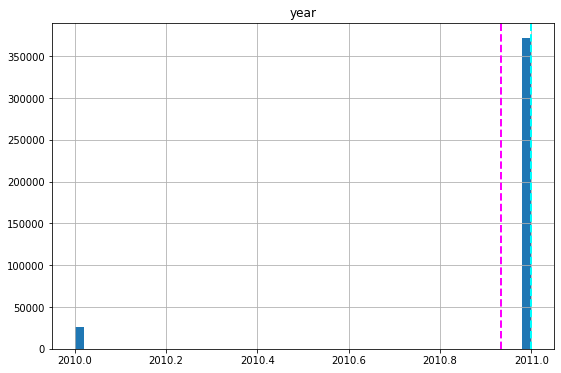

Skewness : -3.5045145019499735
Kurtosis : 10.281673570919017


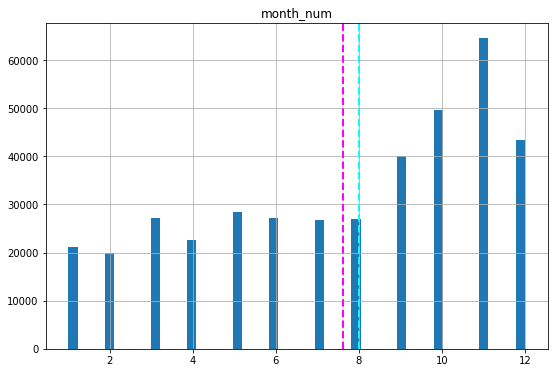

Skewness : -0.4448423572483675
Kurtosis : -1.074460364777609


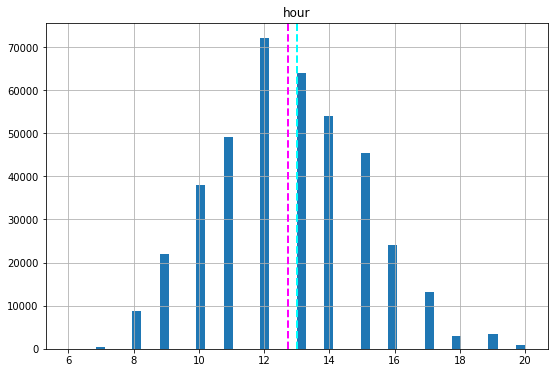

Skewness : 0.18903743045332783
Kurtosis : -0.20968488890482462


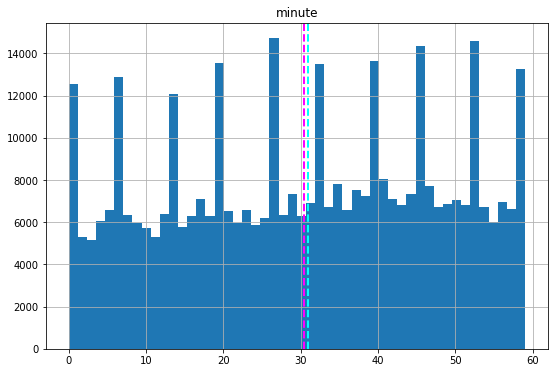

Skewness : -0.08092206133583811
Kurtosis : -1.1655389341755757


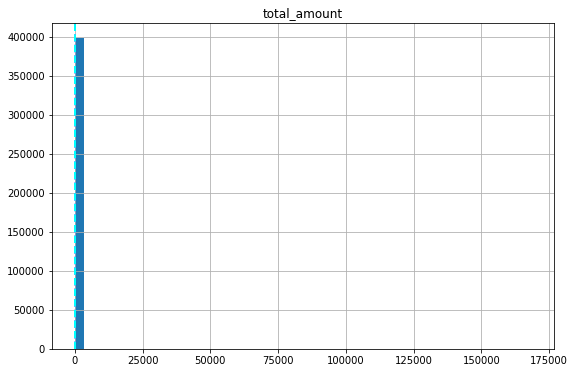

Skewness : 451.465537635017
Kurtosis : 232178.22423598208


In [131]:
# Analyse all numerical feature using histogram
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",df[col].skew())
  print( "Kurtosis :",df[col].kurt())

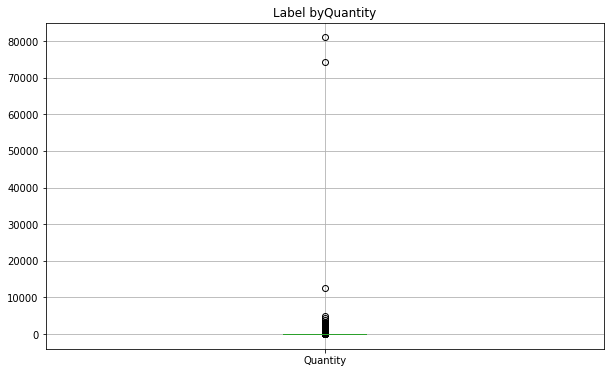

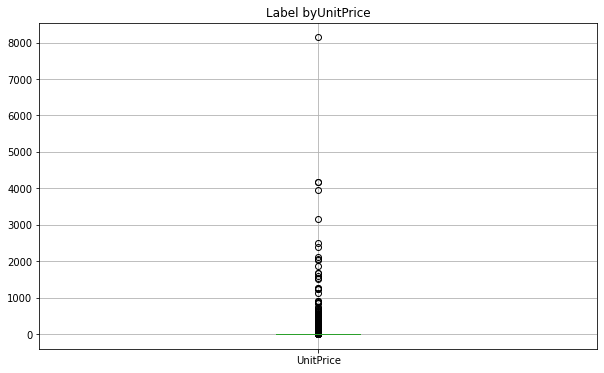

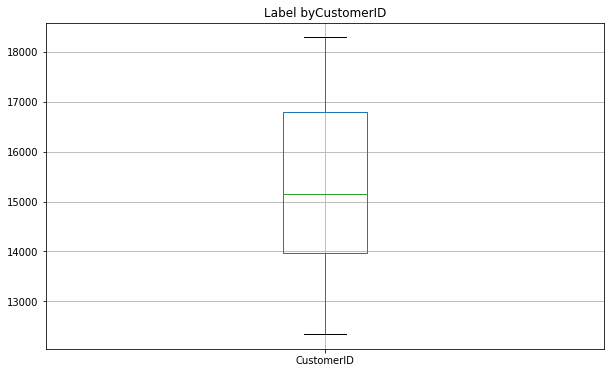

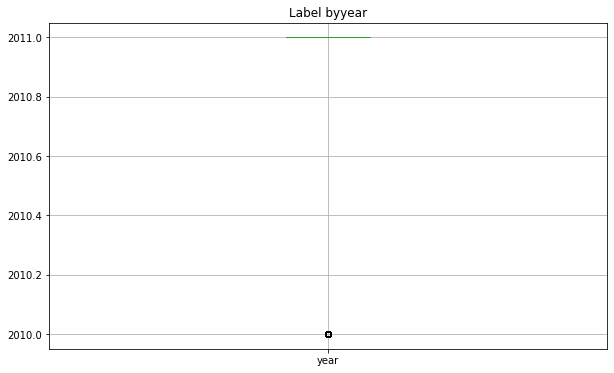

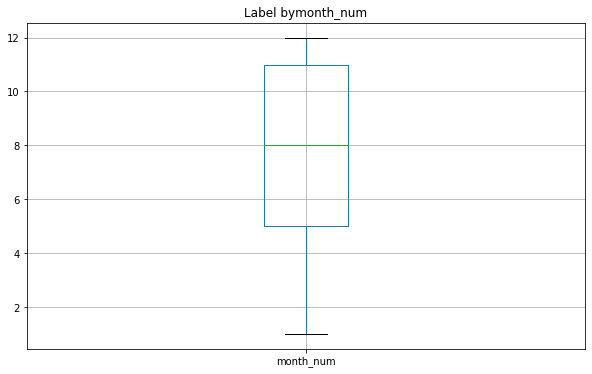

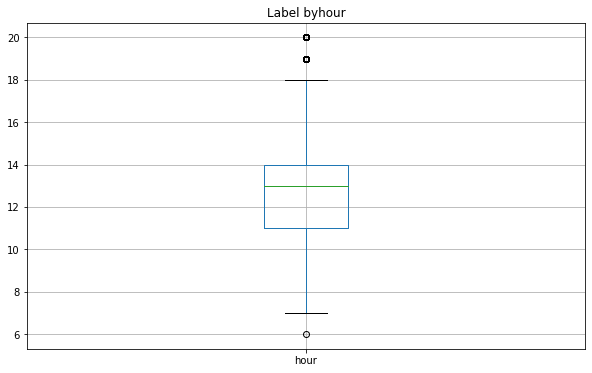

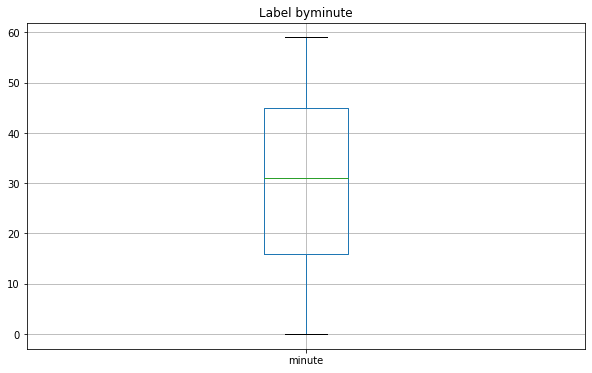

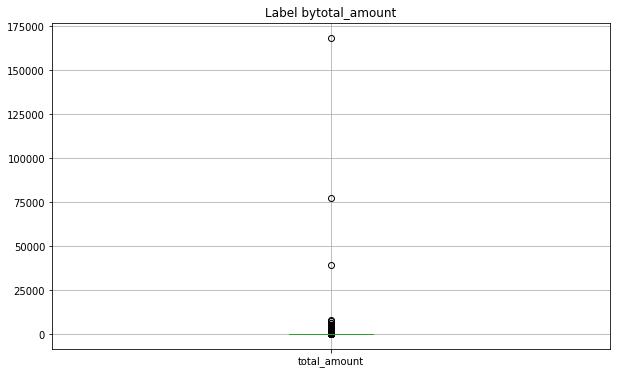

In [132]:
# Plot the box plot for each numerical feature
for col in numerical_features:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  df.boxplot(col)
  ax.set_title("Label by" + col)
plt.show()


## <b>Correlation Matrix

In [133]:
df.corr()

,Quantity,UnitPrice,CustomerID,year,month_num,hour,minute,total_amount
Quantity,1.000000,-0.004561,-0.006411,0.001595,-0.004006,-0.014532,-0.003095,0.908812
UnitPrice,-0.004561,1.000000,-0.010863,-0.000191,-0.005171,-0.000286,-0.000541,0.081646
CustomerID,-0.006411,-0.010863,1.000000,-0.036352,0.030417,0.065852,-0.026865,-0.004104
year,0.001595,-0.000191,-0.036352,1.000000,-0.340655,-0.019763,0.000424,0.000431
month_num,-0.004006,-0.005171,0.030417,-0.340655,1.000000,0.058213,0.008339,-0.002733
hour,-0.014532,-0.000286,0.065852,-0.019763,0.058213,1.000000,-0.122545,-0.013209
minute,-0.003095,-0.000541,-0.026865,0.000424,0.008339,-0.122545,1.000000,-0.002569
total_amount,0.908812,0.081646,-0.004104,0.000431,-0.002733,-0.013209,-0.002569,1.000000


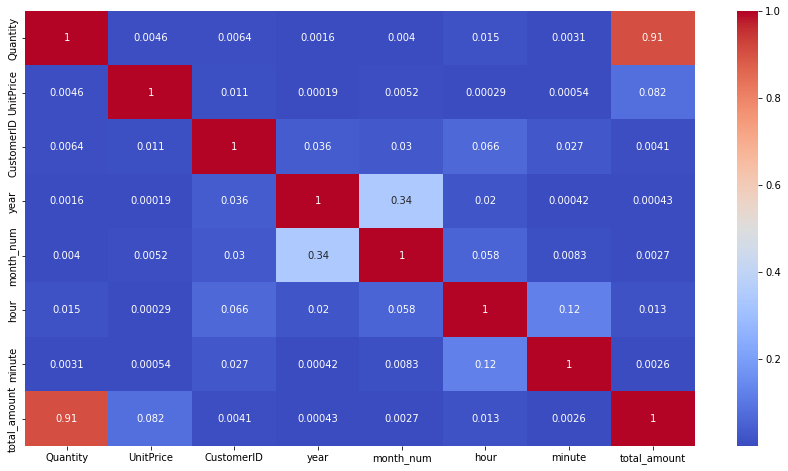

In [134]:
# Plot heatmap to show correlation of different variables
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")


In [135]:
Sale_in_month = df['month'].value_counts().reset_index().rename(columns={'index':'month','month':'count'})
Sale_in_month

,month,count
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


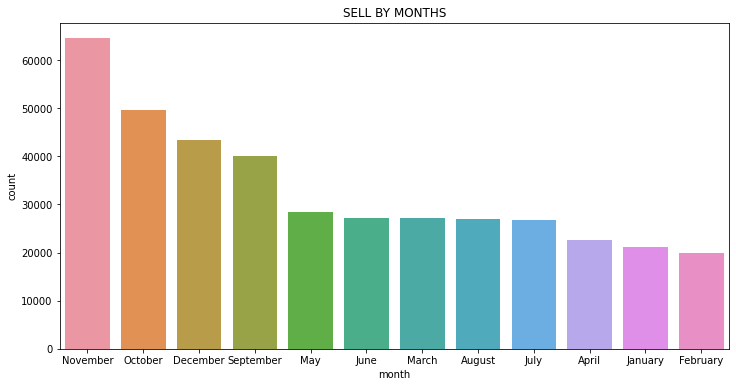

In [136]:
# Visualizing the sell by month.
plt.figure(figsize=(12,6))
sns.barplot(x=Sale_in_month['month'],y=Sale_in_month['count'].sort_values())
plt.title('SELL BY MONTHS')
plt.show()

**OBSERVATION-**
* In month of november the sale was very high.
* But at same time in month of february the sale was very low.

In [137]:
sales_on_day = df['day'].value_counts().reset_index().rename(columns={'index':'day','day':'count'})
sales_on_day

,day,count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


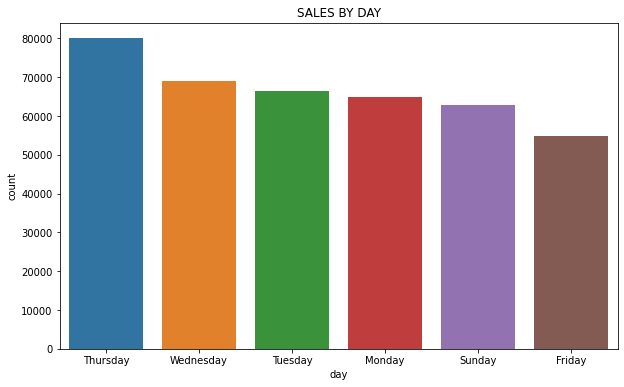

In [138]:
# lets see the sale on day basis.
plt.figure(figsize=(10,6))
sns.barplot(x=sales_on_day['day'],y=sales_on_day['count'])
plt.title('SALES BY DAY')
plt.show()

**OBSERVATION-**
* The highest count of sales occured on the Thursday, and sale at other day are significantly equal amount.

In [140]:
sales_on_day = df['day'].value_counts().reset_index().rename(columns={'index':'day','day':'count'})
sales_on_day

,day,count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


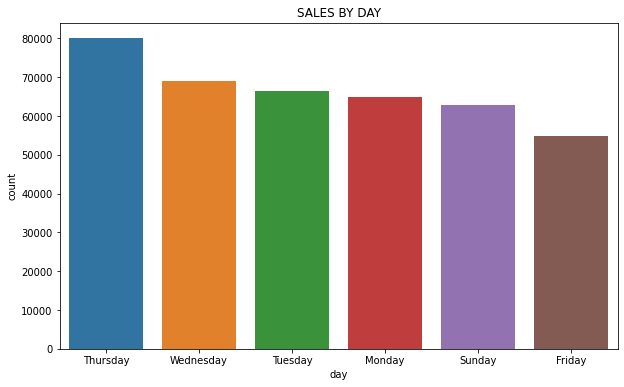

In [141]:
# lets see the sale on day basis.
plt.figure(figsize=(10,6))
sns.barplot(x=sales_on_day['day'],y=sales_on_day['count'])
plt.title('SALES BY DAY')
plt.show()

**OBSERVATION-**
* The highest count of sales occured on the Thursday, and sale at other day are significantly equal amount.

In [143]:
df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [144]:
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'

  else:
    return 'Evening'

In [145]:
df['day_time'] = df['hour'].apply(time)
sale_by_day_timming = df['day_time'].value_counts().reset_index().rename(columns={'index':'day_time','day_time':'count'})
sale_by_day_timming

,day_time,count
0,Afternoon,272764
1,Morning,118107
2,Evening,7053


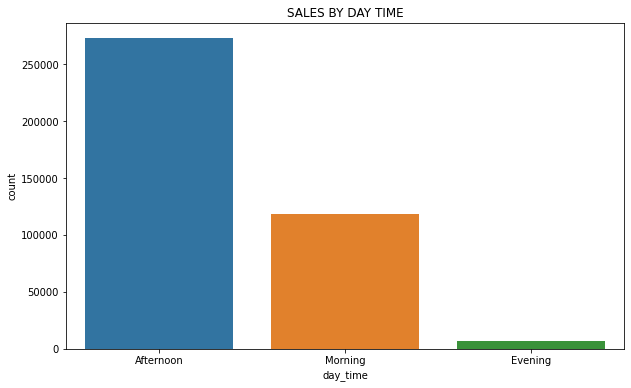

In [146]:
# Lets see the the count of sale on day time i.e 'Morning', 'Afternoon', 'Evening'.
plt.figure(figsize=(10,6))
sns.barplot(x=sale_by_day_timming['day_time'],y=sale_by_day_timming['count'])
plt.title('SALES BY DAY TIME')
plt.show()

**OBSERVATION-**
* At Afternoon session sale count is comparetivly high than Morning and Evening sessions.

In [147]:
# Avarage cost of expenditure by each customer.
avg_cost = df.groupby('CustomerID')['total_amount'].mean().reset_index().rename(columns={'total_amount':'avg_cost'}).sort_values('avg_cost',ascending=False)
avg_cost

,CustomerID,avg_cost
0,12346.0,77183.600000
3009,16446.0,56157.500000
2012,15098.0,13305.500000
2503,15749.0,4453.430000
2088,15195.0,3861.000000
...,...,...
698,13271.0,2.264375
991,13684.0,2.241000
3996,17816.0,2.150588
2316,15503.0,2.101286


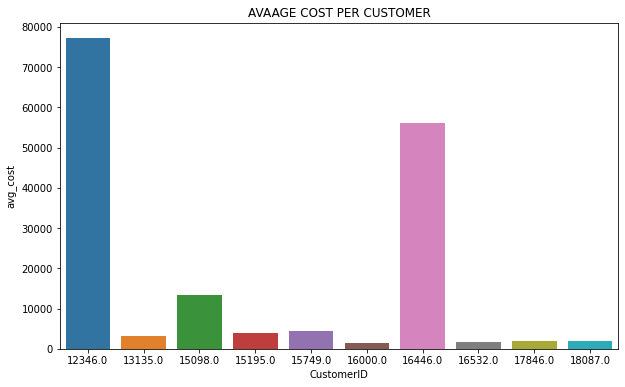

In [148]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_cost['CustomerID'].head(10),y=avg_cost['avg_cost'].head(10))
plt.title('AVAAGE COST PER CUSTOMER')
plt.show()

**OBSERVATION-**
* 77183 Is the highest avg cost spent by customer 12346.
* 56157 Is the second highest avg cost spent by customer 16446.

## <b>Creating Recency, Frequency and Monetary(RFM) Model

Before applying any clustering algorithms it is always necessary to determine various quantitative factors on which the algorithm will perform segmentation. Examples of these would be features such as amount spend, activeness of the customer, their last visit, etc.

 * RFM model which stands for Recency, Frequency, and Monetary is one of such steps in which we determine the recency - days to last visit, frequency - how actively the customer repurchases and monetary - total expenditure of the customer, for each customer. There are other steps too in which we divide each of these features accordingly and calculate a score for each customer. However, this approach doesnot require machine learning algorithms as segmentation can be done manually. Therefore we will skip the second step and directly use the rfm features and feed it to clustering algorithms.

* Recency = Latest Date - Last Inovice Data
* Frequency = count of invoice no. of transaction(s)
* Monetary = Sum of Total Amount for each customer

In [ ]:
# Set Latest date 2011-12-10 as last invoice date was 2011-12-09
#This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)
